In [1]:
'''
Objective:
Create network analytics models separately for the connecting routes and flight halt datasets, utilizing an edge list matrix for directed networks, to derive insights relevant to the business.
Constraints:
1.
Data Quality: Ensure the accuracy, completeness, and consistency of the connecting routes and flight halt datasets before creating network analytics models.
2.
Model Selection: Choose appropriate network analytics measures and techniques based on the nature of the datasets and the business requirements.
3.
Interpretability: Ensure that insights derived from the network analytics models are interpretable and actionable for the business stakeholders.
4.
Performance: Optimize the performance of the network analytics models to handle large datasets efficiently and provide timely insights.
Benefits/Impact:
1.
Route Optimization: By analyzing network structures and patterns, the business can identify optimal routes, reduce flight delays, and improve overall operational efficiency.
2.
Customer Experience: Insights from network analytics models enable the business to enhance customer experience by minimizing travel disruptions, providing accurate information on flight connections, and improving overall service quality.
3.
Resource Allocation: The business can allocate resources effectively by identifying critical routes, potential bottlenecks, and areas for infrastructure improvement based on network analytics insights.
4.
Competitive Advantage: Leveraging network analytics helps the business stay competitive by offering better connectivity, improved route planning, and more reliable flight services compared to competitors.
5.
Strategic Decision-making: Insights derived from network analytics models guide strategic decision-making processes such as route expansion, fleet management, and partnerships with other airlines or airports, leading to long-term growth and profitability.

'''


import pandas as pd
import networkx as nx

In [4]:
flight_hault = pd.read_csv('flight_hault.csv')
flight_hault

1                             Goroka         Goroka.1  \
0        2                             Madang           Madang   
1        3                        Mount Hagen      Mount Hagen   
2        4                             Nadzab           Nadzab   
3        5         Port Moresby Jacksons Intl     Port Moresby   
4        6                         Wewak Intl            Wewak   
...    ...                                ...              ...   
8101  9537    Mansons Landing Water Aerodrome  Mansons Landing   
8102  9538               Port McNeill Airport     Port McNeill   
8103  9539       Sullivan Bay Water Aerodrome     Sullivan Bay   
8104  9540               Deer Harbor Seaplane      Deer Harbor   
8105  9541  San Diego Old Town Transit Center        San Diego   

      Papua New Guinea  GKA  AYGA  -6.081689  145.391881  5282    10  U  \
0     Papua New Guinea  MAG  AYMD  -5.207083  145.788700    20  10.0  U   
1     Papua New Guinea  HGU  AYMH  -5.826789  144.295861  5388  10.0  U   
2     Papua New Guinea  LAE  AYNZ  -6.569828  146.726242   239  10.0  U   
3     Papua New Guinea  POM  AYPY  -9.443383  147.220050   146  10.0  U   
4     Papua New Guinea  WWK  AYWK  -3.583828  143.669186    19  10.0  U   
...                ...  ...   ...        ...         ...   ...   ... ..   
8101            Canada  YMU    \N  50.066667 -124.983333     0  -8.0  A   
8102            Canada  YMP    \N  50.575556 -127.028611   225  -8.0  A   
8103            Canada  YTG    \N  50.883333 -126.833333     0  -8.0  A   
8104     United States  DHB    \N  48.618397 -123.005960     0  -8.0  A   
8105     United States  OLT    \N  32.755200 -117.199500     0  -8.0  A   

      Pacific/Port_Moresby  
0     Pacific/Port_Moresby  
1     Pacific/Port_Moresby  
2     Pacific/Port_Moresby  
3     Pacific/Port_Moresby  
4     Pacific/Port_Moresby  
...                    ...  
8101     America/Vancouver  
8102     America/Vancouver  
8103     America/Vancouver  
8104   America/Los_Angeles  
8105   America/Los_Angeles  

[8106 rows x 12 columns]

In [5]:
connecting_routes = pd.read_csv('connecting_routes.csv')
connecting_routes

2B    410  AER  2965  KZN  2990 Unnamed: 6  0  CR2
0      2B    410  ASF  2966  KZN  2990        NaN  0  CR2
1      2B    410  ASF  2966  MRV  2962        NaN  0  CR2
2      2B    410  CEK  2968  KZN  2990        NaN  0  CR2
3      2B    410  CEK  2968  OVB  4078        NaN  0  CR2
4      2B    410  DME  4029  KZN  2990        NaN  0  CR2
...    ..    ...  ...   ...  ...   ...        ... ..  ...
67657  ZL   4178  WYA  6334  ADL  3341        NaN  0  SF3
67658  ZM  19016  DME  4029  FRU  2912        NaN  0  734
67659  ZM  19016  FRU  2912  DME  4029        NaN  0  734
67660  ZM  19016  FRU  2912  OSS  2913        NaN  0  734
67661  ZM  19016  OSS  2913  FRU  2912        NaN  0  734

[67662 rows x 9 columns]

In [8]:
flight_hault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8106 entries, 0 to 8105
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1                     8106 non-null   int64  
 1   Goroka                8106 non-null   object 
 2   Goroka.1              8106 non-null   object 
 3   Papua New Guinea      8106 non-null   object 
 4   GKA                   5879 non-null   object 
 5   AYGA                  8042 non-null   object 
 6   -6.081689             8106 non-null   float64
 7   145.391881            8106 non-null   float64
 8   5282                  8106 non-null   int64  
 9   10                    8106 non-null   float64
 10  U                     8106 non-null   object 
 11  Pacific/Port_Moresby  8106 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 760.1+ KB


In [7]:
connecting_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   2B          67662 non-null  object
 1   410         67662 non-null  object
 2   AER         67662 non-null  object
 3   2965        67662 non-null  object
 4   KZN         67662 non-null  object
 5   2990        67662 non-null  object
 6   Unnamed: 6  14597 non-null  object
 7   0           67662 non-null  int64 
 8   CR2         67644 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [9]:
flight_hault_columns = ['id','name','city','country','iata_faa','icao','latitude','longitude','altitude','time','dst','tz database time']

In [11]:
flight_hault.columns = flight_hault_columns

flight_hault.columns

Index(['id', 'name', 'city', 'country', 'iata_faa', 'icao', 'latitude',
       'longitude', 'altitude', 'time', 'dst', 'tz database time'],
      dtype='object')

In [17]:
connecting_routes1 = connecting_routes.drop(['2B'], axis = 1)
connecting_routes_columns = ['flights','id','main earport','main earport id','destination','destination id','haults','machinary']
connecting_routes1.columns = connecting_routes_columns
connecting_routes1.columns

Index(['flights', 'id', 'main earport', 'main earport id', 'destination',
       'destination id', 'haults', 'machinary'],
      dtype='object')

In [20]:
connecting_g = nx.Graph()
for_g1 = nx.from_pandas_edgelist(connecting_routes1, source = 'main earport', target = 'destination')

In [26]:
data = pd.DataFrame({'closeness':pd.Series(nx.closeness_centrality(for_g1)),
                    'degree':pd.Series(nx.degree_centrality(for_g1)),
                    'eigenvector':pd.Series(nx.eigenvector_centrality(for_g1)),
                    'betweenness':pd.Series(nx.betweenness_centrality(for_g1)),
                    })

In [27]:
data

closeness    degree  eigenvector   betweenness
2966   0.276289  0.002100     0.004696  7.790111e-07
2990   0.288737  0.006301     0.008879  4.774796e-05
2962   0.296512  0.004800     0.009846  2.729334e-05
2968   0.278162  0.004200     0.006729  4.096218e-06
4078   0.329108  0.015902     0.023313  1.742040e-03
...         ...       ...          ...           ...
6337   0.207251  0.000600     0.000013  9.004502e-08
6287   0.255944  0.000300     0.000268  0.000000e+00
6294   0.256464  0.000900     0.000473  5.875431e-07
6302   0.255964  0.000600     0.000275  0.000000e+00
6793   0.255944  0.000300     0.000268  0.000000e+00

[3334 rows x 4 columns]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3334 entries, 2966 to 6793
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   closeness    3334 non-null   float64
 1   degree       3334 non-null   float64
 2   eigenvector  3334 non-null   float64
 3   betweenness  3334 non-null   float64
dtypes: float64(4)
memory usage: 130.2+ KB


In [33]:
flight_hault1 = flight_hault.iloc[:200, :]
for_g2 = nx.from_pandas_edgelist(flight_hault1, source = 'name', target = 'dst')

In [34]:

data_hault = pd.DataFrame({'degree':pd.Series(nx.degree_centrality(for_g2)),
    'closeness':pd.Series(nx.closeness_centrality(for_g2)),
                          'eigenvector': pd.Series(nx.eigenvector_centrality(for_g2)),
                          'betweennes':pd.Series(nx.betweenness_centrality(for_g2))})

In [35]:
data_hault

degree  closeness   eigenvector  betweennes
Madang                      0.004926   0.013684  7.611321e-49    0.000000
U                           0.024631   0.024631  1.701943e-48    0.000488
Mount Hagen                 0.004926   0.013684  7.611321e-49    0.000000
Nadzab                      0.004926   0.013684  7.611321e-49    0.000000
Port Moresby Jacksons Intl  0.004926   0.013684  7.611321e-49    0.000000
...                              ...        ...           ...         ...
Sandspit                    0.004926   0.415028  5.455497e-02    0.000000
Chris Hadfield              0.004926   0.415028  5.455497e-02    0.000000
Port Hardy                  0.004926   0.415028  5.455497e-02    0.000000
Whitecourt                  0.004926   0.415028  5.455497e-02    0.000000
Sept Iles                   0.004926   0.415028  5.455497e-02    0.000000

[204 rows x 4 columns]

In [36]:
#Problem2:

In [37]:
facebook = pd.read_csv('facebook.csv')
facebook

1  2  3  4  5  6  7  8  9
0  0  1  0  0  0  0  0  0  1
1  1  0  1  0  0  0  0  0  0
2  0  1  0  1  0  0  0  0  0
3  0  0  1  0  1  0  0  0  0
4  0  0  0  1  0  1  0  0  0
5  0  0  0  0  1  0  1  0  0
6  0  0  0  0  0  1  0  1  0
7  0  0  0  0  0  0  1  0  1
8  1  0  0  0  0  0  0  1  0

In [39]:
instagram = pd.read_csv('instagram.csv')
instagram

1  2  3  4  5  6  7  8
0  0  1  1  1  1  1  1  1
1  1  0  0  0  0  0  0  0
2  1  0  0  0  0  0  0  0
3  1  0  0  0  0  0  0  0
4  1  0  0  0  0  0  0  0
5  1  0  0  0  0  0  0  0
6  1  0  0  0  0  0  0  0
7  1  0  0  0  0  0  0  0

In [40]:
linkedin = pd.read_csv('linkedin.csv')
linkedin

1  2  3  4  5  6  7  8  9  10  11  12  13
0   0  1  1  0  0  0  0  0  0   0   0   0   0
1   1  0  1  1  0  0  0  0  0   0   0   0   0
2   1  1  0  1  0  0  0  0  0   0   0   0   0
3   0  1  1  0  0  0  0  0  0   0   0   0   1
4   0  0  0  0  0  1  1  0  0   0   0   0   0
5   0  0  0  0  1  0  1  1  0   0   0   0   0
6   0  0  0  0  1  1  0  1  0   0   0   0   0
7   0  0  0  0  0  1  1  0  0   0   0   0   1
8   0  0  0  0  0  0  0  0  0   1   1   0   0
9   0  0  0  0  0  0  0  0  1   0   1   1   0
10  0  0  0  0  0  0  0  0  1   1   0   1   0
11  0  0  0  0  0  0  0  0  0   1   1   0   1
12  0  0  0  1  0  0  0  1  0   0   0   1   0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       13 non-null     int64
 1   2       13 non-null     int64
 2   3       13 non-null     int64
 3   4       13 non-null     int64
 4   5       13 non-null     int64
 5   6       13 non-null     int64
 6   7       13 non-null     int64
 7   8       13 non-null     int64
 8   9       13 non-null     int64
 9   10      13 non-null     int64
 10  11      13 non-null     int64
 11  12      13 non-null     int64
 12  13      13 non-null     int64
dtypes: int64(13)
memory usage: 1.4 KB


In [48]:
f_edges = []
for i in range(len(facebook)):
    for j in range(i+1, len(facebook)):
        f_edges.append((i,j))

In [50]:
for_g3 = nx.Graph()
for_g3.add_edges_from(f_edges)

In [53]:
i_edges = []
for i1 in range(len(instagram)):
    for j1 in range(i1+1, len(instagram)):
        i_edges.append((i1,j1))

In [54]:
for_g4 = nx.Graph()
for_g4.add_edges_from(i_edges)

In [55]:
l_edges = []
for i2 in range(len(linkedin)):
    for j2 in range(i2+1, len(linkkedin)):
        l_edges.append((i2, j2))

NameError: name 'linkkedin' is not defined

In [57]:
for_g5 = nx.Graph()
for_g5.add_edges_from(l_edges)

In [61]:
#visual representation

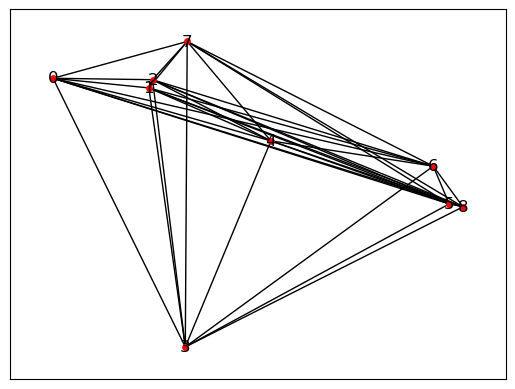

In [60]:
import matplotlib.pyplot as plt
f = plt.figure()
pos1 = nx.spring_layout(for_g3, k = 0.015)
nx.draw_networkx(for_g3, pos1, ax = f.add_subplot(111), node_size = 15, node_color  = 'red')
plt.show()

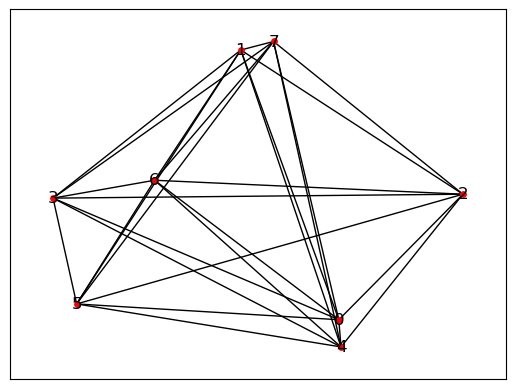

In [62]:
f1 = plt.figure()
pos2 = nx.spring_layout(for_g4, k = 0.015)
nx.draw_networkx(for_g4, pos2, ax = f1.add_subplot(111), node_size = 15, node_color  = 'red')
plt.show()

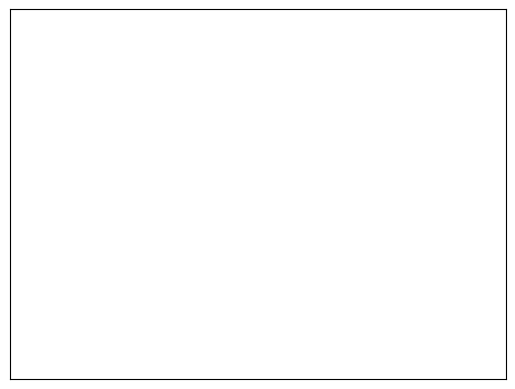

In [63]:
f2 = plt.figure()
pos3 = nx.spring_layout(for_g5, k = 0.015)
nx.draw_networkx(for_g5, pos3, ax = f2.add_subplot(111), node_size = 15, node_color  = 'red')
plt.show()